**Install Necessary Libraries**

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.9 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.1.1
    Uninstalling qiskit-2.1.1:
      Successfully uninstalled qiskit-2.1.1


In [ ]:
pip install qiskit_algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
pip install -U qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.5 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2205c79b2ca7c3c0c08012670b103da2d532fdbbd4728c7205d28a2ffdf826d9
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


**PART I**

Preliminary Test of Quantum Kernel SVM workflow vs KD-Trees vs KMeans for a Generated, Easily Clusterable Dataset

**Background**

Research on quantum machine learning (QML)—specifically quantum kernel methods—has predominantly focused on applications to support vector machines (SVMs). Quantum kernels leverage quantum circuits to embed classical data into a high-dimensional quantum feature space, exploiting quantum phenomena such as entanglement and interference. This approach potentially enables quantum SVMs (QSVMs) to capture complex data relationships that may be less accessible to classical algorithms, offering notable advantages in certain classification tasks.

However, there is little research that systematically compares quantum SVMs using quantum kernels with classical tree-based methods like kd-trees, particularly in contexts such as ambiguous boundary classification or robustness to noise. While there are new quantum algorithms emerging for tree-based models (for example, quantum decision trees and random forests), direct, comprehensive studies benchmarking the performance or robustness of quantum SVMs against kd-trees remain scarce.

**Robustness Checks**

To achieve reliable classification performance, it is crucial to optimize the quantum kernel such that the relevant quantum states are both noise-resilient and readily distinguishable. This involves comprehensive robustness evaluations, including testing under diverse noise models and comparing results across datasets of varying difficulty. Conducting experiments that differentiate “easy-to-classify” from “hard-to-classify” datasets will clarify whether kernel noise impacts simpler data less severely than more complex or overlapping cases.

**Research Direction**

When the primary objective is to identify and utilize robust, easily classifiable states, the exact placement of decision boundaries becomes less consequential. In this context, kd-trees can play a valuable role by efficiently partitioning and managing regions of uncertainty or ambiguity. Leveraging their recursive nearest-neighbor structure, kd-trees are well-suited to resolving ambiguities in “unclassifiable” or “undetermined” areas, potentially providing an effective strategy for handling multi-state (m-state) cases where data points exhibit significant ambiguity.

In [ ]:
# Import standard libraries
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit_aer.primitives import Sampler
from qiskit.primitives import StatevectorSampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute

# Import Scikit-learn libraries
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [ ]:
# Generate Dataset
def generate_dataset(n_sample, n_features, n_informative, n_redundant, random_state):
  X, y = make_classification(n_samples=n_sample, n_features=n_features, n_informative=n_informative, n_redundant=n_redundant, random_state=random_state)
  return X, y

# An informative feature is one that is relevant to the classification task
# Redundant features are those that are linear combinations of other features (linearly dependent)

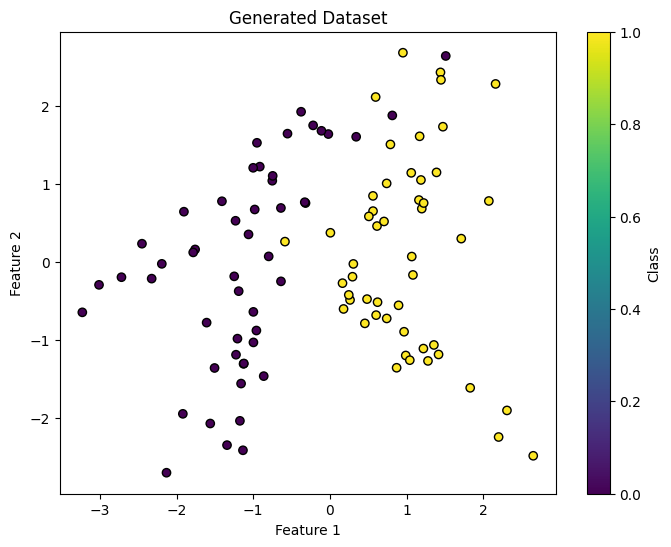

In [ ]:
# Example of Visualing A Generated Dataset
X, y = generate_dataset(n_sample=100, n_features=2, n_informative=2, n_redundant=0, random_state=37)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.title('Generated Dataset')
plt.show()

**Quantum Kernel --> SVC Implementation**

In [ ]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZFeatureMap
from qiskit.circuit.library import EfficientSU2

In [ ]:
# Most quantum features maps assume inputfeatures are scaled to [0, 2pi] because their encoding is via rotations.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# We should also check how varying the training size affects both the accuracy and speed of these methods
# Train, Test, Split
print(X_train.shape)
print(X_test.shape)
print("Train label counts:", np.bincount(y_train))
print("Test label counts:", np.bincount(y_test))

(80, 2)
(20, 2)
Train label counts: [40 40]
Test label counts: [10 10]


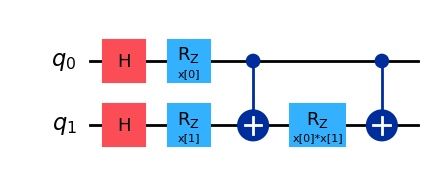

In [ ]:
from qiskit.circuit import QuantumCircuit, ParameterVector
def custom_feature_map(num_features):
  params = ParameterVector('x', num_features)
  qc = QuantumCircuit(num_features)

  # # Encode each feature with an RZ gate and a Hadamard to create superposition
  for idx in range(num_features):
        qc.h(idx)
        qc.rz(params[idx], idx)

  # Add feature interaction/entanglement
  qc.cx(0, 1)
  qc.rz(params[0] * params[1], 1)
  qc.cx(0, 1)

  return qc, params

qc, params = custom_feature_map(X_train.shape[1])
display(qc.draw('mpl'))

In [ ]:
custom_circuit, params = custom_feature_map(X_train.shape[1])
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = FidelityQuantumKernel(feature_map=custom_circuit, fidelity=fidelity)

/tmp/ipython-input-93-653279768.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [ ]:
# OPTION 1: Kernel as a callable function
kernel_svc = SVC(kernel=kernel.evaluate)
kernel_svc.fit(X_train, y_train)

kernel_score = kernel_svc.score(X_test, y_test)
print(f"Accuracy: {kernel_score}")

Accuracy: 0.7


In [ ]:
# OPTION 2: Precompute training and testing kernel matrixes prior to running the SVC algorithm
train_kernel_matrix = kernel.evaluate(x_vec = X_train)
test_kernel_matrix = kernel.evaluate(x_vec = X_test, y_vec = X_train)

kernel_svc = SVC(kernel='precomputed')
kernel_svc.fit(train_kernel_matrix, y_train)

kernel_score = kernel_svc.score(test_kernel_matrix, y_test)
print(f"Accuracy: {kernel_score}")

Accuracy: 0.7


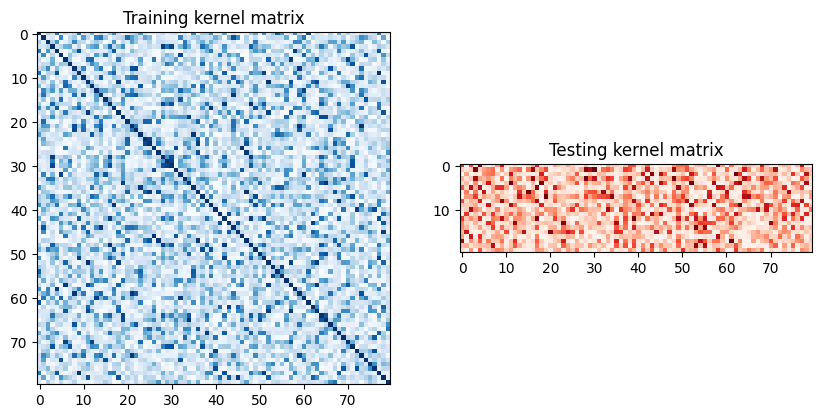

In [ ]:
# Visualize training and testin kernel matrices
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(train_kernel_matrix), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Training kernel matrix")

axs[1].imshow(np.asmatrix(test_kernel_matrix), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Testing kernel matrix")

plt.show()

As we see, for the dataset the custom kernel we created is rather simple, only has linear entanglement (instead of full/circular). The next step is to find the optimal kernel.

In [ ]:
import numpy as np
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Custom Feature Map
def custom_feature_map(num_features, reps=1, entanglement=None):  # entanglement argument for consistency (not used)
    qc = QuantumCircuit(num_features)
    for rep in range(reps):
        params = ParameterVector(f'x{rep}_', num_features)
        for i in range(num_features):
            qc.h(i)
            qc.rz(params[i], i)
        for i in range(num_features - 1):
            qc.cx(i, i + 1)
            qc.rz(params[i] * params[i + 1], i + 1)
            qc.cx(i, i + 1)
    return qc

sampler = Sampler()
results = []

feature_map_types = {
    "ZFeatureMap": ZFeatureMap,
    "ZZFeatureMap": ZZFeatureMap,
    "PauliFeatureMap": PauliFeatureMap,
    "CustomMap": custom_feature_map
}
reps_range = [1, 2, 3, 4, 5]
entanglement_types = ['full', 'linear']

for name, map_class in feature_map_types.items():
    for reps in reps_range:
        if name == "CustomMap" and reps > 1:
            continue
        # Only apply entanglement where supported
        if name == "CustomMap":
            fm = custom_feature_map(num_features=X.shape[1], reps=reps)
            entanglement_label = "custom"
            entanglement_set = [None]
        elif name == "ZFeatureMap":
            fm = ZFeatureMap(feature_dimension=X.shape[1], reps=reps)
            entanglement_label = "none"
            entanglement_set = [None]  # entanglement not supported
        else:
            # For ZZ and Pauli feature maps, test both entanglement types
            entanglement_set = entanglement_types

        for entanglement in entanglement_set:
            if name == "CustomMap" or name == "ZFeatureMap":
                # Already built fm, entanglement_label set
                pass
            else:
                fm = map_class(feature_dimension=X.shape[1], reps=reps, entanglement=entanglement)
                entanglement_label = entanglement

            kernel = FidelityQuantumKernel(feature_map=fm, fidelity=ComputeUncompute(sampler=sampler))

            def kernel_wrapper(X1, X2):
                return kernel.evaluate(x_vec=X1, y_vec=X2)

            print(f"Evaluating kernel: {name}, reps={reps}, entanglement={entanglement_label}")
            svc = SVC(kernel=kernel_wrapper)
            svc.fit(X_train, y_train)
            y_pred = svc.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            print(f"Accuracy: {acc:.4f}")
            results.append(((name, reps, entanglement_label), acc))

            if name == "CustomMap" and reps == 1:  # Only test one (no entanglement)
                break
            if name == "ZFeatureMap":  # Only test one (no entanglement)
                break

# Report best result
best_kernel = max(results, key=lambda x: x[1])
print("\nBest Kernel:", best_kernel[0][0])
print("Best Reps:", best_kernel[0][1])
print("Best Entanglement:", best_kernel[0][2])
print("Accuracy:", best_kernel[1])

/tmp/ipython-input-98-1360432518.py:27: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Evaluating kernel: ZFeatureMap, reps=1, entanglement=none
Accuracy: 0.8500
Evaluating kernel: ZFeatureMap, reps=2, entanglement=none
Accuracy: 0.7000
Evaluating kernel: ZFeatureMap, reps=3, entanglement=none
Accuracy: 0.6500
Evaluating kernel: ZFeatureMap, reps=4, entanglement=none
Accuracy: 0.8500
Evaluating kernel: ZFeatureMap, reps=5, entanglement=none
Accuracy: 0.8500
Evaluating kernel: ZZFeatureMap, reps=1, entanglement=full
Accuracy: 0.8000
Evaluating kernel: ZZFeatureMap, reps=1, entanglement=linear
Accuracy: 0.8000
Evaluating kernel: ZZFeatureMap, reps=2, entanglement=full
Accuracy: 0.8000
Evaluating kernel: ZZFeatureMap, reps=2, entanglement=linear
Accuracy: 0.8000
Evaluating kernel: ZZFeatureMap, reps=3, entanglement=full
Accuracy: 0.5500
Evaluating kernel: ZZFeatureMap, reps=3, entanglement=linear
Accuracy: 0.5500
Evaluating kernel: ZZFeatureMap, reps=4, entanglement=full
Accuracy: 0.3500
Evaluating kernel: ZZFeatureMap, reps=4, entanglement=linear
Accuracy: 0.3500
Evaluatin

As an additional robustness and experimental rigor test, we will implement Qiskit's QuantumKernelTrainer

Reference: https://qiskit-community.github.io/qiskit-machine-learning/locale/fr_FR/tutorials/08_quantum_kernel_trainer.html


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit.visualization import circuit_drawer

In [ ]:
# Create trainable feature map: trainable Ry layer + ZZFeatureMap
# Ensure parameter names are distinct
training_params = ParameterVector("theta", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)

# Create the ZZFeatureMap with distinct parameter names (e.g., 'phi')
feature_dimension = 2
fm1_params = ParameterVector("phi", feature_dimension)
fm1 = ZZFeatureMap(feature_dimension)
# Assign parameters to fm1 with the new names
fm1 = fm1.assign_parameters(fm1_params)

# Compose the circuits
feature_map = fm0.compose(fm1)

print(circuit_drawer(feature_map))
print(f"Trainable parameters: {training_params}")
print(f"Feature map parameters: {fm1_params}")

     ┌──────────────┐┌──────────────────────────────┐
q_0: ┤ Ry(theta[0]) ├┤0                             ├
     ├──────────────┤│  ZZFeatureMap(phi[0],phi[1]) │
q_1: ┤ Ry(theta[0]) ├┤1                             ├
     └──────────────┘└──────────────────────────────┘
Trainable parameters: theta, ['theta[0]']
Feature map parameters: phi, ['phi[0]', 'phi[1]']


In [ ]:
# Quantum kernel and Sampler Setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = TrainableFidelityQuantumKernel(
    fidelity=fidelity,
    feature_map=feature_map,
    training_parameters=training_params,
)

/tmp/ipython-input-101-3951451707.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [ ]:
class QKTCallback:
  def __init__(self):
    self.loss = []

  def callback(self, nfev, params, loss, step, accepted):
    self.loss.append(loss)

cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)

In [ ]:
# Quantum Kernel Trainer
qkt = QuantumKernelTrainer(
    quantum_kernel=kernel,
    loss="svc_loss",
    optimizer=spsa_opt,
    initial_point=[np.pi / 2]
)

In [ ]:
# Train the quantum kernel
qkt_results = qkt.fit(X_train, y_train)
optimized_kernel = qkt_results.quantum_kernel
print("Optimal parameters:", qkt_results.optimal_parameters)
print("Optimal value:", qkt_results.optimal_value)

Optimal parameters: {ParameterVectorElement(theta[0]): np.float64(2.1537625314264144)}
Optimal value: 46.9144649752173


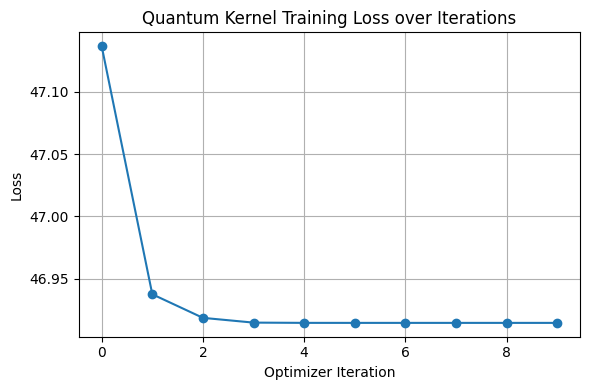

In [ ]:
# Visualizing the kernel training process
# After QKT training has completed:
plt.figure(figsize=(6, 4))
plt.plot(cb_qkt.loss, marker='o')
plt.xlabel('Optimizer Iteration')
plt.ylabel('Loss')
plt.title('Quantum Kernel Training Loss over Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Fit and Test the Model
svc = SVC(kernel=optimized_kernel.evaluate)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



**Classical KD-Tree Implementation**

In [ ]:
from sklearn.neighbors import KDTree
from collections import Counter
import numpy as np

def classify_with_kd_tree(X_query, X_train, y_train, k):
    """
    Classifies points in X_query using k-NN with KD-Tree.

    Parameters:
        X_query (ndarray): Points to classify, shape (m, d)
        X_train (ndarray): Training data points, shape (n, d)
        y_train (ndarray): Training labels, shape (n,)
        k (int): Number of nearest neighbors

    Returns:
        ndarray: Predicted labels for X_query, shape (m,)
    """
    # Build the KD-tree on training data
    tree = KDTree(X_train)

    # Query k nearest neighbors for each test point
    dists, indices = tree.query(X_query, k=k)

    # Predict labels based on majority vote
    y_pred = []
    for idx_list in indices:
        neighbor_labels = y_train[idx_list]
        most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)

    return np.array(y_pred)

# Retrieve predictions on test set
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    y_pred = classify_with_kd_tree(X_test, X_train, y_train, k)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with k={k}: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Accuracy with k=1: 0.9500
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Accuracy with k=2: 0.9500
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20

Accuracy with k=3: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00       

*Description of the Algorithm Above*

The provided code implements a K-Nearest Neighbors (KNN) classification approach using a KD-Tree for efficient neighbor search. The classify_with_kd_tree function buils a KD-Tree from the training data. For each point in the test dat, it queries the tree to find the k nearest neighbors in the training set. The function then determines the predicted class for each test point by performing a majority vote among the labels of its k nearest neighbors. This allows function allows us to iterate through several k values to determine which one results in the highest accuracy.

Accuracy with optimal k=3: 1.0000
Unique labels predicted in meshgrid: [0 1]
Training labels: [0 1]

Actual vs. Predicted for Test Set:
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


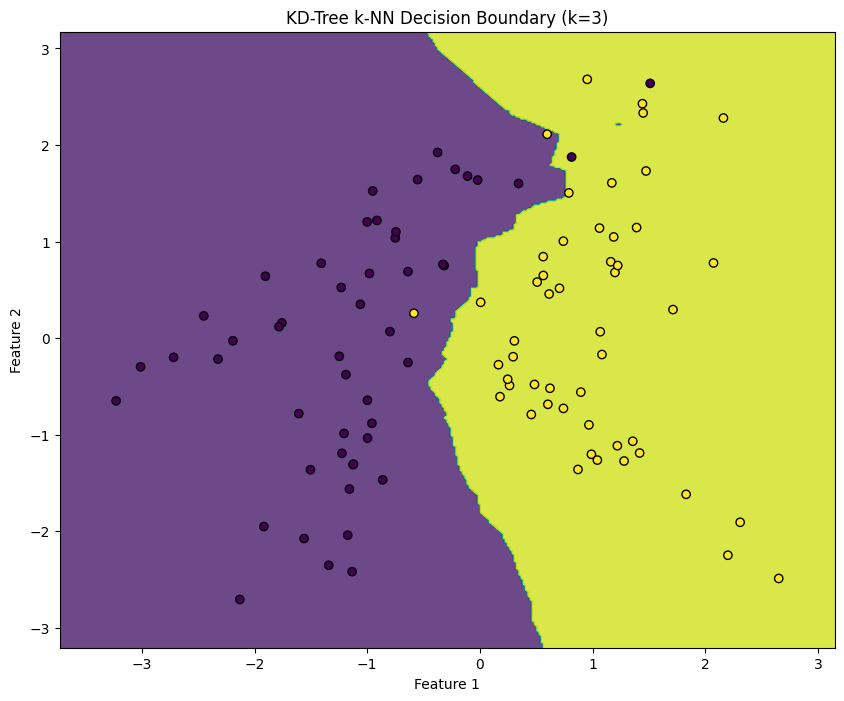

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_optimal = 3  # Based on previous results

# Re-train with the optimal k
y_pred_optimal_k = classify_with_kd_tree(X_test, X_train, y_train, k_optimal)
acc_optimal_k = accuracy_score(y_test, y_pred_optimal_k)
print(f"Accuracy with optimal k={k_optimal}: {acc_optimal_k:.4f}")

# Create a finer meshgrid with a margin
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5 , X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Apply the same sclaing as with our original generated dataset
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_scaled = scaler.transform(mesh_points)

Z = classify_with_kd_tree(mesh_scaled, X_train, y_train, k_optimal)
print("Unique labels predicted in meshgrid:", np.unique(Z))
print("Training labels:", np.unique(y_train))

print("\nActual vs. Predicted for Test Set:")
for actual, pred in zip(y_test, y_pred_optimal_k):
    print(f"Actual: {actual}, Predicted: {pred}")

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KD-Tree k-NN Decision Boundary (k={k_optimal})')
plt.show()

**KMeans Clustering**

K-Means Clustering Accuracy: 0.8000


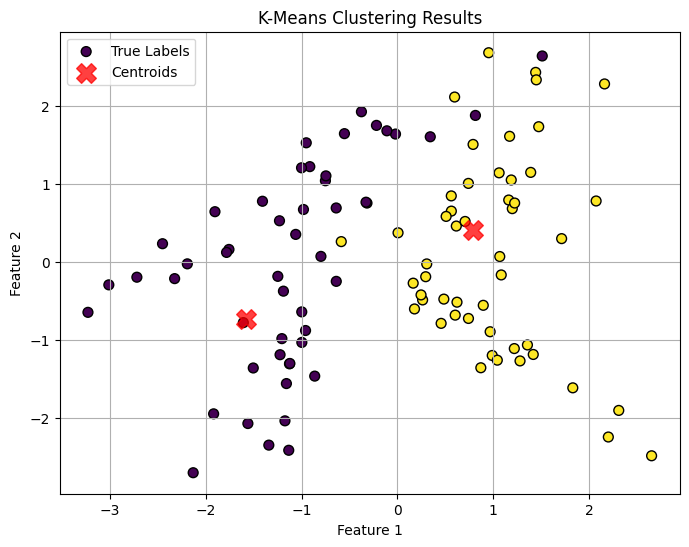

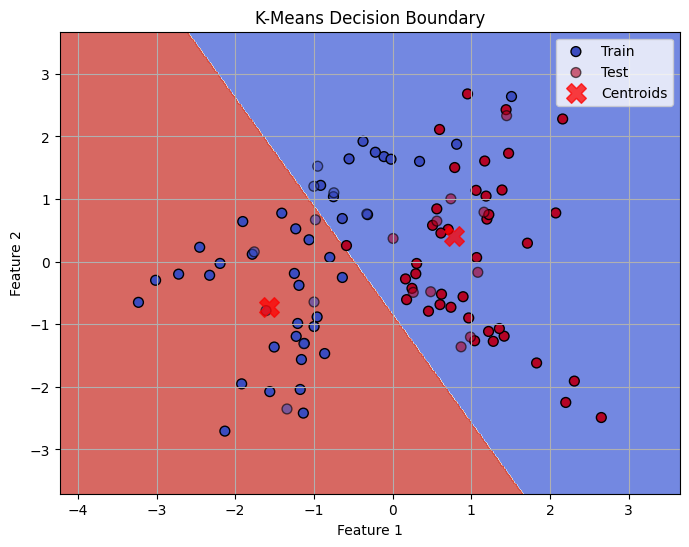

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode

# Steps 1 and 2 are to generate and scale data

# 3. Train KMeans on scaled training data
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train)

# 4. Predict on test data
y_pred_kmeans = kmeans.predict(X_test)

# 5. Map cluster labels to actual labels based on majority vote
labels = np.zeros_like(y_pred_kmeans)
for i in range(2):
    mask = (y_pred_kmeans == i)
    if np.any(mask):
        labels[mask] = mode(y_test[mask], keepdims=True)[0]

# 6. Evaluate accuracy
accuracy_kmeans = accuracy_score(y_test, labels)
print(f"K-Means Clustering Accuracy: {accuracy_kmeans:.4f}")

# 7. Inverse-transform centroids for plotting on original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# 8. Plot clustering results with true labels
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k', s=50, label='True Labels')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', s=200, alpha=0.75, label='Centroids', marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 9. Create meshgrid (on original feature scale)
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_scaled = scaler.transform(mesh_points)  # Scale for prediction

# 10. Predict on mesh and reshape
Z_kmeans = kmeans.predict(mesh_scaled).reshape(xx.shape)

# 11. Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_kmeans, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot original (unscaled) training/test data
X_train_orig = scaler.inverse_transform(X_train)
X_test_orig = scaler.inverse_transform(X_test)

plt.scatter(X_train_orig[:, 0], X_train_orig[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', s=50, label='Train')
plt.scatter(X_test_orig[:, 0], X_test_orig[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.6, label='Test')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title('K-Means Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

**Apply same procedure/workflow to the ad_hoc_data**

**Quantum Kernel --> SVC**

In [ ]:
from qiskit_machine_learning.utils import algorithm_globals
algorithm_globals.random_seed = 12345

In [ ]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

train_features1, train_labels1, test_features1, test_labels1, adhoc_total1 = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.5,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

train_features2, train_labels2, test_features2, test_labels2, adhoc_total2 = ad_hoc_data(
    training_size=20,
    test_size=5,
    n=adhoc_dimension,
    gap=0.8,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )

def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

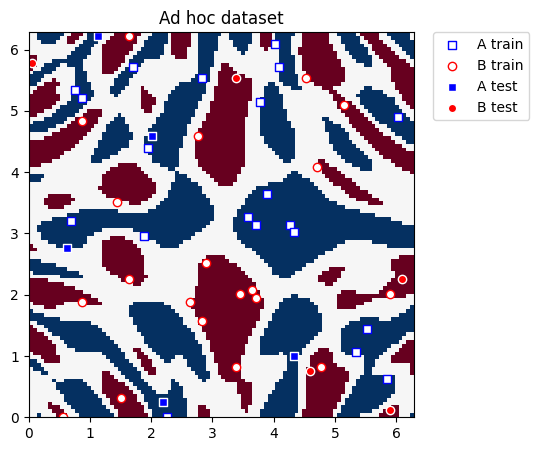

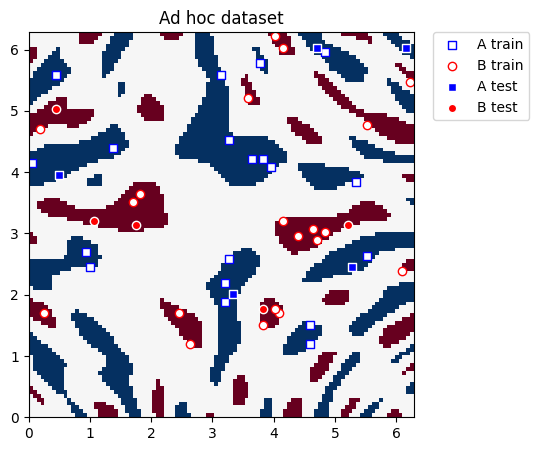

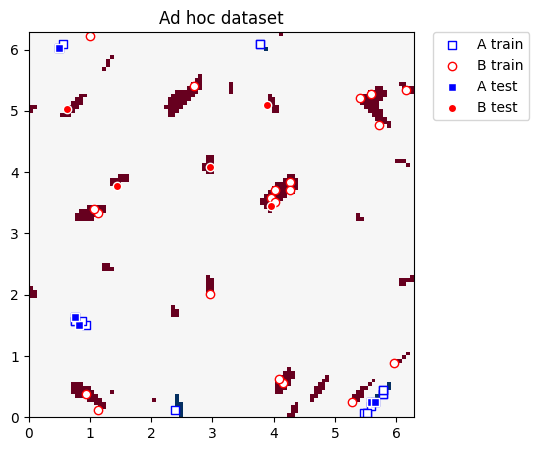

In [ ]:
# Visualize both datasets
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)
plot_dataset(train_features1, train_labels1, test_features1, test_labels1, adhoc_total1)
plot_dataset(train_features2, train_labels2, test_features2, test_labels2, adhoc_total2)

In [ ]:
# Binary classification, so it is customary to begin with a ZZFeatureMap
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [ ]:
from sklearn.svm import SVC

adhoc_svc = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc.fit(train_features, train_labels)

adhoc_score_callable_function = adhoc_svc.score(test_features, test_labels)

print(f"Callable kernel classification test score dataset1: {adhoc_score_callable_function}")



adhoc_svc1 = SVC(kernel=adhoc_kernel.evaluate)

adhoc_svc1.fit(train_features1, train_labels1)

adhoc_score_callable_function1 = adhoc_svc1.score(test_features1, test_labels1)

print(f"Callable kernel classification test score dataset2: {adhoc_score_callable_function1}")

Callable kernel classification test score dataset1: 1.0
Callable kernel classification test score dataset2: 1.0


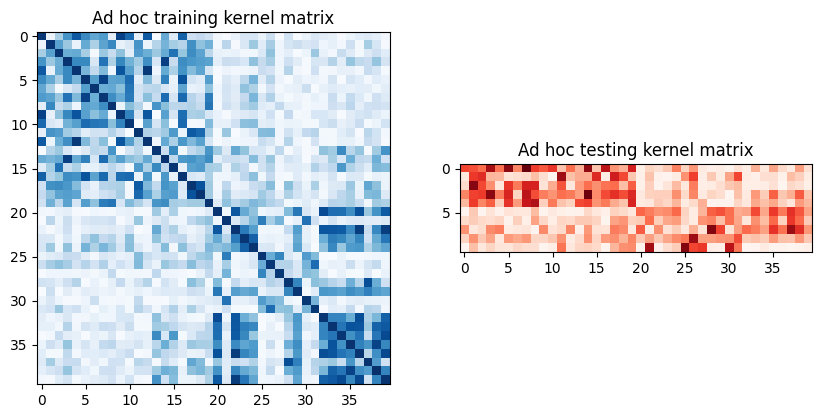

In [ ]:
# Example of visualizing precomputed kernel classification matrices
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [ ]:
adhoc_svc = SVC(kernel="precomputed")

adhoc_svc.fit(adhoc_matrix_train, train_labels)

adhoc_score_precomputed_kernel = adhoc_svc.score(adhoc_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {adhoc_score_precomputed_kernel}")

Precomputed kernel classification test score: 1.0


**Classical KD-Trees Implementation**

In [ ]:
from sklearn.neighbors import KDTree
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

def classify_with_kd_tree(X_query, X_train, y_train, k):
    """
    Classifies points in X_query using k-NN with KD-Tree.

    Parameters:
        X_query (ndarray): Points to classify, shape (m, d)
        X_train (ndarray): Training data points, shape (n, d)
        y_train (ndarray): Training labels, shape (n,)
        k (int): Number of nearest neighbors

    Returns:
        ndarray: Predicted labels for X_query, shape (m,)
    """
    # Build the KD-tree on training data
    tree = KDTree(X_train)

    # Query k nearest neighbors for each test point
    dists, indices = tree.query(X_query, k=k)

    # Predict labels based on majority vote
    y_pred = []
    for idx_list in indices:
        neighbor_labels = y_train[idx_list]
        most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)

    return np.array(y_pred)

# Retrieve predictions on test set for ad_hoc_data (dataset1)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    y_pred = classify_with_kd_tree(test_features, train_features, train_labels, k)
    acc = accuracy_score(test_labels, y_pred)
    print(f"Accuracy with k={k}: {acc:.4f}")
    print(classification_report(test_labels, y_pred))

Accuracy with k=1: 0.8000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

Accuracy with k=2: 0.8000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

Accuracy with k=3: 0.7000
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70       

Accuracy with optimal k=1: 0.8000
Unique labels predicted in meshgrid: [0 1]
Training labels: [0 1]

Actual vs. Predicted for Test Set (ad hoc dataset 1):
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


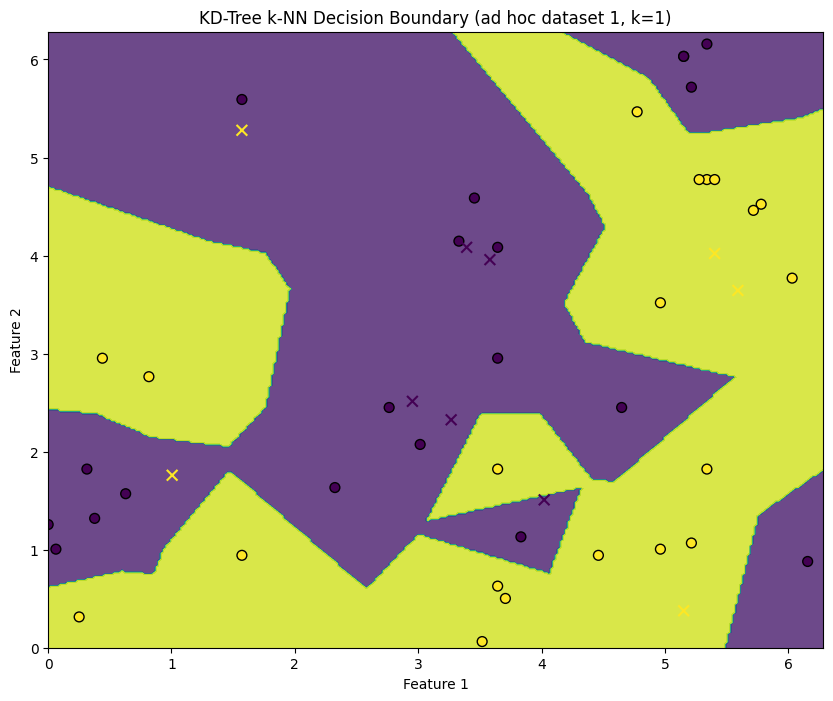

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k_optimal = 1  # Based on previous results for ad hoc dataset 1

# Re-evaluate with the optimal k for ad hoc dataset 1
y_pred_optimal_k = classify_with_kd_tree(test_features, train_features, train_labels, k_optimal)
acc_optimal_k = accuracy_score(test_labels, y_pred_optimal_k)
print(f"Accuracy with optimal k={k_optimal}: {acc_optimal_k:.4f}")

# Create a finer meshgrid with a margin for ad hoc data range
h = 0.02  # step size in the mesh
x_min, x_max = 0, 2 * np.pi
y_min, y_max = 0, 2 * np.pi
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each point in the meshgrid using the ad hoc training data
mesh_points = np.c_[xx.ravel(), yy.ravel()]
# No scaling needed for ad hoc data as it's already in [0, 2pi]

Z = classify_with_kd_tree(mesh_points, train_features, train_labels, k_optimal)
print("Unique labels predicted in meshgrid:", np.unique(Z))
print("Training labels:", np.unique(train_labels))

print("\nActual vs. Predicted for Test Set (ad hoc dataset 1):")
for actual, pred in zip(test_labels, y_pred_optimal_k):
    print(f"Actual: {actual}, Predicted: {pred}")

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot the original ad hoc data points
plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap='viridis', edgecolors='k', s=50, label='Train')
plt.scatter(test_features[:, 0], test_features[:, 1], c=test_labels, cmap='viridis', marker='x', s=60, label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KD-Tree k-NN Decision Boundary (ad hoc dataset 1, k={k_optimal})')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

We observe below that as the gap between the classes increases in the ad_hoc dataset the KD-Tree appears to perform better.

In [ ]:
from sklearn.neighbors import KDTree
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

def classify_with_kd_tree(X_query, X_train, y_train, k):
    """
    Classifies points in X_query using k-NN with KD-Tree.

    Parameters:
        X_query (ndarray): Points to classify, shape (m, d)
        X_train (ndarray): Training data points, shape (n, d)
        y_train (ndarray): Training labels, shape (n,)
        k (int): Number of nearest neighbors

    Returns:
        ndarray: Predicted labels for X_query, shape (m,)
    """
    # Build the KD-tree on training data
    tree = KDTree(X_train)

    # Query k nearest neighbors for each test point
    dists, indices = tree.query(X_query, k=k)

    # Predict labels based on majority vote
    y_pred = []
    for idx_list in indices:
        neighbor_labels = y_train[idx_list]
        most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)

    return np.array(y_pred)

# Retrieve predictions on test set for ad_hoc_data (dataset1)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    y_pred = classify_with_kd_tree(test_features1, train_features1, train_labels1, k)
    acc = accuracy_score(test_labels1, y_pred)
    print(f"Accuracy with k={k}: {acc:.4f}")
    print(classification_report(test_labels, y_pred))

Accuracy with k=1: 0.9000
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Accuracy with k=2: 0.9000
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Accuracy with k=3: 0.5000
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49       

Accuracy with optimal k=1: 0.9000
Unique labels predicted in meshgrid: [0 1]
Training labels: [0 1]

Actual vs. Predicted for Test Set (ad hoc dataset 2):
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


/tmp/ipython-input-39-1388059626.py:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_features1[:, 0], test_features1[:, 1], c=test_labels1, cmap=plt.cm.coolwarm,


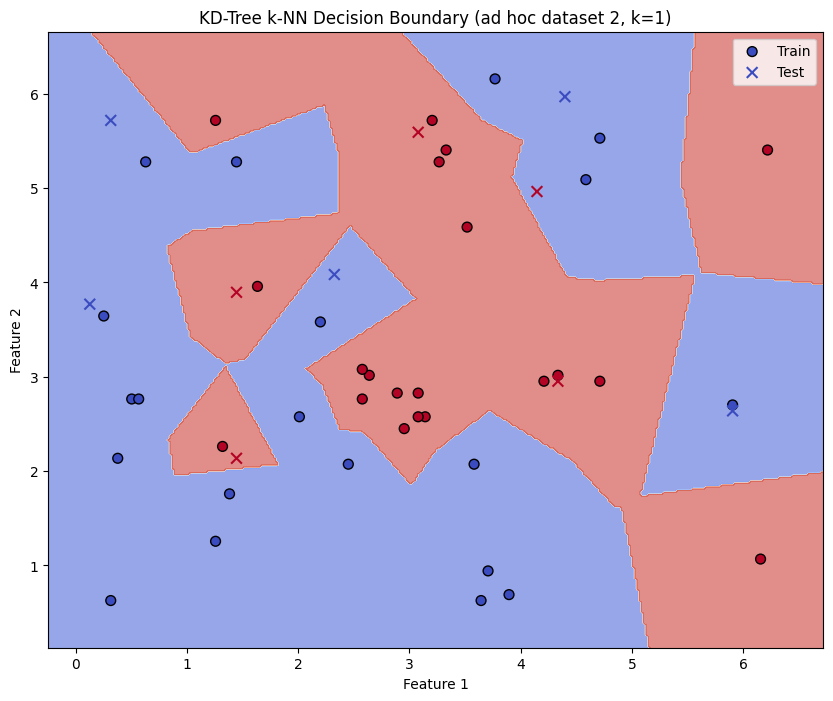

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_optimal = 1  # Based on previous results for ad hoc dataset 1

# Re-evaluate with the optimal k for ad hoc dataset 2
y_pred_optimal_k = classify_with_kd_tree(test_features1, train_features1, train_labels1, k_optimal)
acc_optimal_k = accuracy_score(test_labels1, y_pred_optimal_k)
print(f"Accuracy with optimal k={k_optimal}: {acc_optimal_k:.4f}")

# Create a finer meshgrid with a small margin around the training data
h = 0.02  # step size in the mesh
x_min, x_max = train_features1[:, 0].min() - 0.5, train_features1[:, 0].max() + 0.5
y_min, y_max = train_features1[:, 1].min() - 0.5, train_features1[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = classify_with_kd_tree(mesh_points, train_features1, train_labels1, k_optimal)
print("Unique labels predicted in meshgrid:", np.unique(Z))
print("Training labels:", np.unique(train_labels1))

print("\nActual vs. Predicted for Test Set (ad hoc dataset 2):")
for actual, pred in zip(test_labels1, y_pred_optimal_k):
    print(f"Actual: {actual}, Predicted: {pred}")

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# Plot training points with circles
plt.scatter(train_features1[:, 0], train_features1[:, 1], c=train_labels1, cmap=plt.cm.coolwarm,
            edgecolors='k', s=50, marker='o', label='Train')

# Plot test points with crosses
plt.scatter(test_features1[:, 0], test_features1[:, 1], c=test_labels1, cmap=plt.cm.coolwarm,
            edgecolors='k', s=60, marker='x', label='Test')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KD-Tree k-NN Decision Boundary (ad hoc dataset 2, k={k_optimal})')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KDTree
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

def classify_with_kd_tree(X_query, X_train, y_train, k):
    """
    Classifies points in X_query using k-NN with KD-Tree.

    Parameters:
        X_query (ndarray): Points to classify, shape (m, d)
        X_train (ndarray): Training data points, shape (n, d)
        y_train (ndarray): Training labels, shape (n,)
        k (int): Number of nearest neighbors

    Returns:
        ndarray: Predicted labels for X_query, shape (m,)
    """
    # Build the KD-tree on training data
    tree = KDTree(X_train)

    # Query k nearest neighbors for each test point
    dists, indices = tree.query(X_query, k=k)

    # Predict labels based on majority vote
    y_pred = []
    for idx_list in indices:
        neighbor_labels = y_train[idx_list]
        most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)

    return np.array(y_pred)

# Retrieve predictions on test set for ad_hoc_data (dataset1)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in k_values:
    y_pred = classify_with_kd_tree(test_features2, train_features2, train_labels2, k)
    acc = accuracy_score(test_labels2, y_pred)
    print(f"Accuracy with k={k}: {acc:.4f}")
    print(classification_report(test_labels, y_pred))

Accuracy with k=1: 0.8000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

Accuracy with k=2: 0.8000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

Accuracy with k=3: 0.8000
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79       

Accuracy with optimal k=5: 0.9000
Unique labels predicted in meshgrid: [0 1]
Training labels: [0 1]

Actual vs. Predicted for Test Set (ad hoc dataset 3):
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


/tmp/ipython-input-46-1022324925.py:39: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_features2[:, 0], test_features2[:, 1], c=test_labels2, cmap=plt.cm.coolwarm,


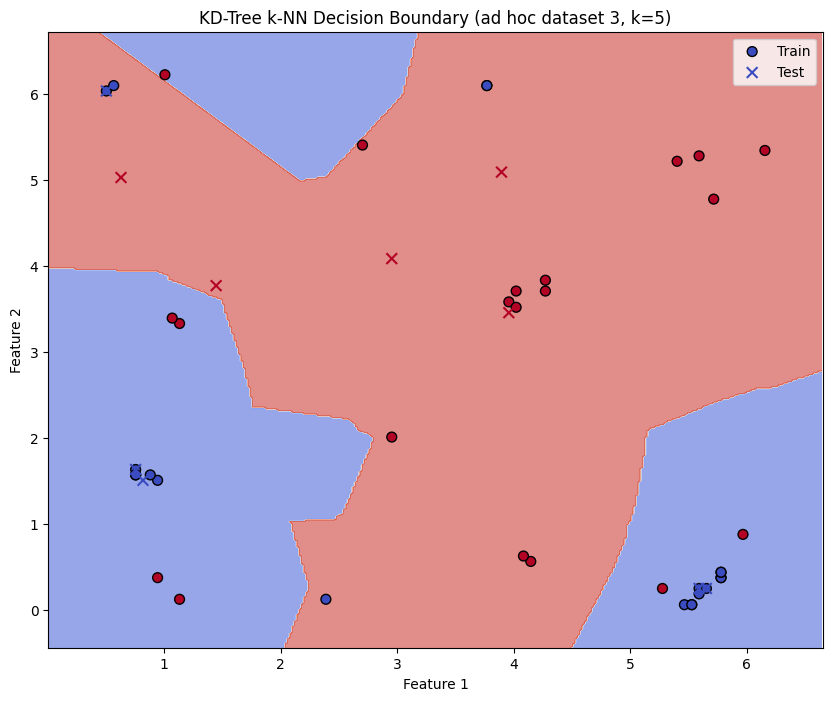

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_optimal = 5  # Based on previous results for ad hoc dataset 3

# Re-evaluate with the optimal k for ad hoc dataset 3
y_pred_optimal_k = classify_with_kd_tree(test_features2, train_features2, train_labels2, k_optimal)
acc_optimal_k = accuracy_score(test_labels2, y_pred_optimal_k)
print(f"Accuracy with optimal k={k_optimal}: {acc_optimal_k:.4f}")

# Create a finer meshgrid with a small margin around the training data
h = 0.02  # step size in the mesh
x_min, x_max = train_features2[:, 0].min() - 0.5, train_features2[:, 0].max() + 0.5
y_min, y_max = train_features2[:, 1].min() - 0.5, train_features2[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = classify_with_kd_tree(mesh_points, train_features2, train_labels2, k_optimal)
print("Unique labels predicted in meshgrid:", np.unique(Z))
print("Training labels:", np.unique(train_labels2))

print("\nActual vs. Predicted for Test Set (ad hoc dataset 3):")
for actual, pred in zip(test_labels2, y_pred_optimal_k):
    print(f"Actual: {actual}, Predicted: {pred}")

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# Plot training points with circles
plt.scatter(train_features2[:, 0], train_features2[:, 1], c=train_labels2, cmap=plt.cm.coolwarm,
            edgecolors='k', s=50, marker='o', label='Train')

# Plot test points with crosses
plt.scatter(test_features2[:, 0], test_features2[:, 1], c=test_labels2, cmap=plt.cm.coolwarm,
            edgecolors='k', s=60, marker='x', label='Test')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KD-Tree k-NN Decision Boundary (ad hoc dataset 3, k={k_optimal})')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

**KMeans Implementation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Assuming train_features, train_labels, test_features, test_labels (dataset 1)
# and train_features1, train_labels1, test_features1, test_labels1 (dataset 2) are already loaded

datasets = {
    "Ad Hoc Dataset 1": (train_features, train_labels, test_features, test_labels),
    "Ad Hoc Dataset 2": (train_features1, train_labels1, test_features1, test_labels1),
}

n_clusters_range = range(2, 11)  # Experiment with 2 to 10 clusters

for dataset_name, (train_features, train_labels, test_features, test_labels) in datasets.items():
    print(f"\n--- Processing {dataset_name} ---")

    best_accuracy = -1
    optimal_n_clusters = -1
    results_for_dataset = []

    for n_clusters in n_clusters_range:
        print(f"  Trying n_clusters = {n_clusters}")

        # 1. No explicit scaling needed for ad hoc data as it's already in [0, 2pi]

        # 2. Train KMeans on training data
        # Handle potential warnings for n_init with newer sklearn versions
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto' if n_clusters > 1 else 1)
        kmeans.fit(train_features)

        # 3. Predict on test data
        y_pred_kmeans = kmeans.predict(test_features)

        # 4. Map cluster labels to actual labels based on majority vote
        labels = np.zeros_like(y_pred_kmeans)
        # Assuming original datasets have 2 classes (0 and 1)
        for i in range(n_clusters): # Iterate through predicted clusters
            mask = (y_pred_kmeans == i)
            if np.any(mask):
                 # Get the true labels of the training points assigned to this cluster
                training_labels_in_cluster = train_labels[kmeans.predict(train_features) == i]

                if len(training_labels_in_cluster) > 0:
                    # Calculate the mode (most frequent label) if the cluster is not empty
                    mode_result = mode(training_labels_in_cluster, keepdims=True)
                    # Ensure we are accessing the mode correctly
                    if mode_result.count.size > 0:
                        labels[mask] = mode_result.mode[0]
                    else:
                        # Fallback if mode is empty
                        # This case is less likely if training_labels_in_cluster is not empty,
                        # but included for robustness. Assign a neutral value or the other class.
                        # Assigning 0 as a default - adjust if needed
                        labels[mask] = 0
                else:
                    # If the cluster is empty (no training points assigned),
                    # assign a default label. Assigning 0 as a default - adjust if needed
                    labels[mask] = 0

        # 5. Evaluate accuracy
        accuracy_kmeans = accuracy_score(test_labels, labels)
        print(f"  Accuracy: {accuracy_kmeans:.4f}")
        results_for_dataset.append((n_clusters, accuracy_kmeans))

        # Update best accuracy
        if accuracy_kmeans > best_accuracy:
            best_accuracy = accuracy_kmeans
            optimal_n_clusters = n_clusters

    print(f"\n  Optimal n_clusters for {dataset_name}: {optimal_n_clusters} with Accuracy: {best_accuracy:.4f}")


--- Processing Ad Hoc Dataset 1 ---
  Trying n_clusters = 2
  Accuracy: 0.3000
  Trying n_clusters = 3
  Accuracy: 0.4000
  Trying n_clusters = 4
  Accuracy: 0.5000
  Trying n_clusters = 5
  Accuracy: 0.5000
  Trying n_clusters = 6
  Accuracy: 0.8000
  Trying n_clusters = 7
  Accuracy: 0.6000
  Trying n_clusters = 8
  Accuracy: 0.7000
  Trying n_clusters = 9
  Accuracy: 0.6000
  Trying n_clusters = 10
  Accuracy: 0.6000

  Optimal n_clusters for Ad Hoc Dataset 1: 6 with Accuracy: 0.8000

--- Processing Ad Hoc Dataset 2 ---
  Trying n_clusters = 2
  Accuracy: 0.3000
  Trying n_clusters = 3
  Accuracy: 0.4000
  Trying n_clusters = 4
  Accuracy: 0.5000
  Trying n_clusters = 5
  Accuracy: 0.5000
  Trying n_clusters = 6
  Accuracy: 0.8000
  Trying n_clusters = 7
  Accuracy: 0.6000
  Trying n_clusters = 8
  Accuracy: 0.7000
  Trying n_clusters = 9
  Accuracy: 0.6000
  Trying n_clusters = 10
  Accuracy: 0.6000

  Optimal n_clusters for Ad Hoc Dataset 2: 6 with Accuracy: 0.8000



--- Plotting KMeans for Ad Hoc Dataset 1 with 6 clusters ---


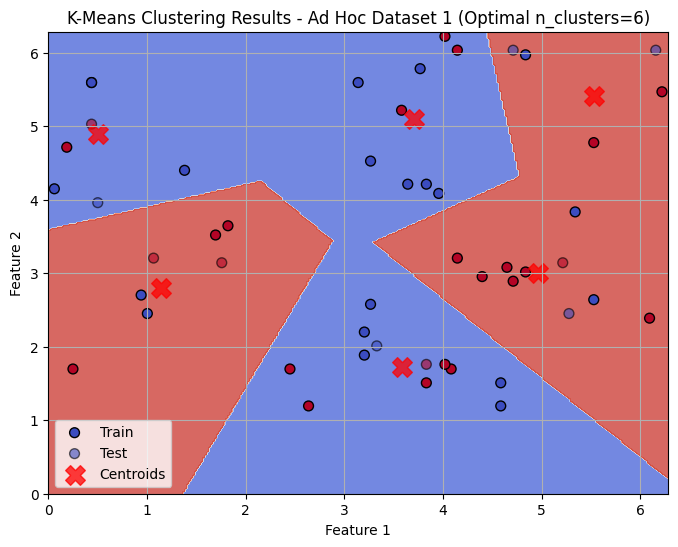


--- Plotting KMeans for Ad Hoc Dataset 2 with 6 clusters ---


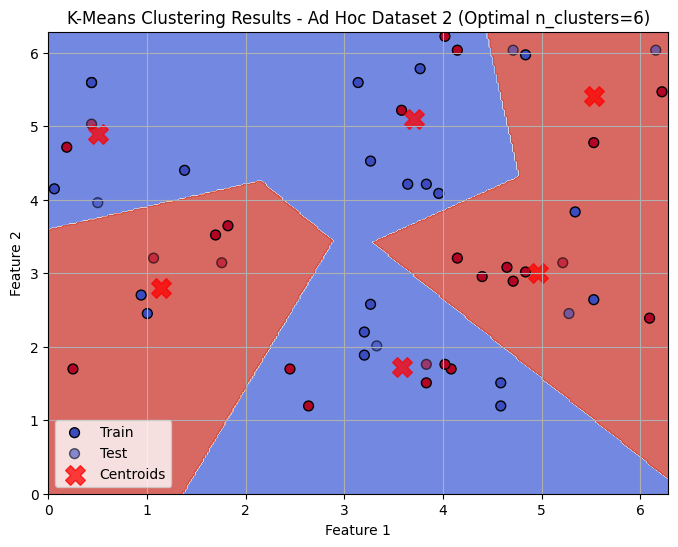

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming train_features, train_labels, test_features, test_labels (dataset 1)
# and train_features1, train_labels1, test_features1, test_labels1 (dataset 2) are already loaded

datasets = {
    "Ad Hoc Dataset 1": (train_features, train_labels, test_features, test_labels),
    "Ad Hoc Dataset 2": (train_features1, train_labels1, test_features1, test_labels1),
}

optimal_n_clusters = 6 # Based on the previous analysis in cell kPNn_CvcOeev

for dataset_name, (train_features, train_labels, test_features, test_labels) in datasets.items():
    print(f"\n--- Plotting KMeans for {dataset_name} with {optimal_n_clusters} clusters ---")

    # Train KMeans with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
    kmeans.fit(train_features) # Fit on training data

    # Get centroids
    centroids = kmeans.cluster_centers_

    # Create meshgrid for decision boundary
    h = 0.02
    x_min, x_max = 0, 2 * np.pi
    y_min, y_max = 0, 2 * np.pi
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict cluster for each point in the meshgrid
    Z_kmeans_raw = kmeans.predict(mesh_points)

    # Map cluster prediction on mesh to labels (using the mapping derived from training data)
    Z_kmeans = np.zeros_like(Z_kmeans_raw)
    for i in range(optimal_n_clusters):
        mask = (Z_kmeans_raw == i)
        # Get the true labels of the training points assigned to this cluster
        training_labels_in_cluster = train_labels[kmeans.predict(train_features) == i]
        if len(training_labels_in_cluster) > 0:
             mode_result = mode(training_labels_in_cluster, keepdims=True)
             if mode_result.count.size > 0:
                 Z_kmeans[mask] = mode_result.mode[0]
             else:
                 # Fallback if mode is empty
                 Z_kmeans[mask] = 0 # Assign a default label
        else:
             # If the cluster is empty, assign a default label
             Z_kmeans[mask] = 0 # Assign a default label


    Z_kmeans = Z_kmeans.reshape(xx.shape)


    # Plotting
    plt.figure(figsize=(8, 6))

    # Plot decision boundary
    plt.contourf(xx, yy, Z_kmeans, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot training points
    plt.scatter(train_features[:, 0], train_features[:, 1], c=train_labels, cmap=plt.cm.coolwarm, edgecolors='k', s=50, label='Train')

    # Plot test points
    plt.scatter(test_features[:, 0], test_features[:, 1], c=test_labels, cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.6, label='Test')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

    plt.title(f'K-Means Clustering Results - {dataset_name} (Optimal n_clusters={optimal_n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

Perform the same workflow with more than 2 features and robustness checks (comparison between easy and difficult to cluster datasets)

In [ ]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

#Noise Model
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit_aer import AerSimulator

#KD-Tree model + Performance Metrics
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import time
import random

from qiskit.circuit import QuantumCircuit
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.primitives import StatevectorSampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from sklearn.svm import SVC

from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.circuit.library import ZZFeatureMap

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

prob_1q: represents the probability of a depolarizing error occuring after a single-qubit gate.

prob_2q: This represents the probability of depolarizing error occuring after a two-qubit gate (like a CNOT). Two-qubit gates are generally more prone to errors than single-qubit gates.

In [ ]:
# Build a depolarizing noise model for AerSimulator
def build_depolarizing_noise_model(prob_1q=0.01, prob_2q=0.05):
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(depolarizing_error(prob_1q, 1), ['u1', 'u2', 'u3', 'sx', 'x'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error(prob_2q, 2), ['cx'])
    return noise_model

**Robustness Checks:**

To systematically evaluate the performance and robustness of the quantum kernel SVM and KD-Tree classifiers across datasets of varying complexity, we will employ the following methods:

*   **Class Separability:** We can control the inherent separability of the classes within the dataset. For instance, when each class is designed to consist of a single, well-defined cluster, the classes tend to be more easily separable. The `class_sep` parameter allows us to adjust the distance between these class clusters; a higher value (e.g., 2.0) indicates a greater separation, making the classification task simpler.
*   **Label Noise:** We can introduce label noise to assess the classifiers' resilience. Setting `flip_y=0.0` signifies that no labels are randomly flipped during dataset generation, representing a scenario without label noise. By varying this parameter, we can simulate real-world conditions where data might be imperfect.

By manipulating parameters like `class_sep` and `flip_y`, we aim to create datasets with controlled levels of difficulty, enabling a thorough examination of how the quantum and classical classification methods perform under different conditions.

In [ ]:
pip install -U qiskit qiskit-aer qiskit-machine-learning qiskit-algorithms

  Using cached qiskit-2.1.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)


Dataset Customization

In [ ]:
def make_easy_data(n_samples, n_features):
    # Well separated classes, no label noise
    X, y = make_classification(
        n_samples=n_samples, n_features=n_features, n_informative=n_features,
        n_redundant=0, n_clusters_per_class=1, flip_y=0.0, class_sep=2.0, random_state=42
    )
    return X, y

def make_hard_data(n_samples, n_features):
    # Overlapping classes, label noise present
    X, y = make_classification(
        n_samples=n_samples, n_features=n_features, n_informative=n_features,
        n_redundant=0, n_clusters_per_class=2, flip_y=0.2, class_sep=0.5, random_state=42
    )
    return X, y

In [ ]:
# We can further test dataset complexity by adding noise to feature data and flip labels randomly
# More fine-tuned control on the noise, applicable to any dataset, not just those generated by make_classification.

def add_data_noise(X, y, noise_std=0.2, label_flip_prob=0.10):
    np.random.seed(0)
    # Add Gaussian noise
    noisy_X = X + np.random.normal(0, noise_std, size=X.shape)
    # label noise
    mask = np.random.rand(len(y)) < label_flip_prob
    noisy_y = y.copy()
    # Flip the labels selected by the mask - bitstring manipulation
    noisy_y[mask] = 1 - noisy_y[mask]
    return noisy_X, noisy_y

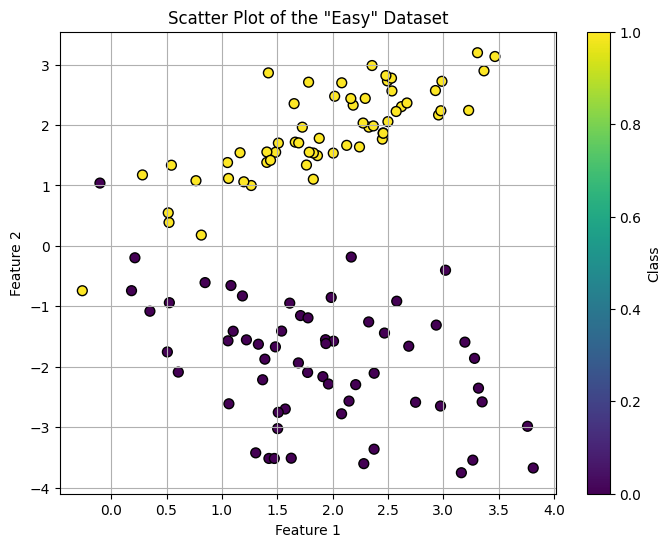

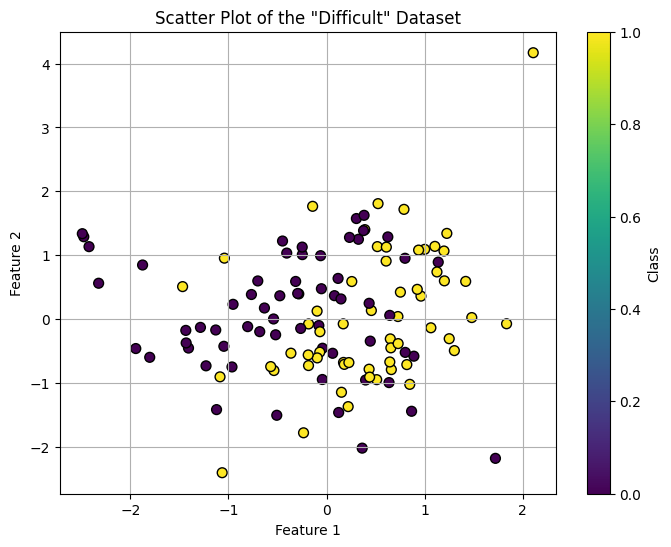

In [ ]:
# Visualizing the difference between a well-clusterable and not well-clusterable dataset

n_samples = 120
n_features = 2 # Set features to 2 for easy visualization

# Generate Easy Dataset
X_easy, y_easy = make_easy_data(n_samples, n_features)

# Generate Difficult Dataset
X_difficult, y_difficult = make_hard_data(n_samples, n_features)

# Visualize Easy Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_easy[:, 0], X_easy[:, 1], c=y_easy, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('Scatter Plot of the "Easy" Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

# Visualize Difficult Dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_difficult[:, 0], X_difficult[:, 1], c=y_difficult, cmap='viridis', marker='o', edgecolors='k', s=50)
plt.title('Scatter Plot of the "Difficult" Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

Objectives for Benchmarking Workflow Function:
- Find the optimal k for k-NN (KD-tree) automatically.
- Define a trainable quantum kernel feature map (Ry gates + ZZFeatureMap, with clear parameter separation for Qiskit KernelTrainer).
- Train the quantum kernel using QuantumKernelTrainer and SPSA optimizer to find optimal kernel parameters.
- Provide benchmarking for both quantum kernel SVM and KD-tree on clean, noisy, PCA-reduced data, etc.
- Work for arbitrary datasets and features as required by the for loop.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
from collections import Counter

from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel, TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_algorithms.optimizers import SPSA
from sklearn.svm import SVC

In [ ]:
# Helper: Ad hoc k-NN KD-tree
def classify_with_kd_tree(X_query, X_train, y_train, k):
    tree = KDTree(X_train)
    _, indices = tree.query(X_query, k=k)
    y_pred = []
    for idx_list in indices:
        neighbor_labels = y_train[idx_list]
        most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)
    return np.array(y_pred)

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, k_values):
    best_acc = -1
    best_k = None
    best_pred = None
    for k in k_values:
        y_pred = classify_with_kd_tree(X_test, X_train, y_train, k)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_k = k
            best_pred = y_pred
    return best_k, best_acc, best_pred

In [ ]:
# Quantum Kernel + SVM/QKT
def make_trainable_feature_map(n_features):
    # Example: Ry(θ) on all, then ZZFeatureMap(ϕ) (each with defined ParameterVector)
    theta = ParameterVector("theta", 1)
    phi = ParameterVector("phi", n_features)
    fm0 = QuantumCircuit(n_features)
    for qubit in range(n_features):
        fm0.ry(theta[0], qubit)
    fm1 = ZZFeatureMap(n_features)
    fm1 = fm1.assign_parameters(phi)
    return fm0.compose(fm1), theta, phi

class QKTCallback:
    def __init__(self):
        self.loss = []
    def callback(self, nfev, params, loss, step, accepted):
        self.loss.append(loss)

def quantum_kernel_benchmark(X_train, X_test, y_train, y_test, use_qkt=False, maxiter=10):
    n_features = X_train.shape[1]
    qc, theta, phi = make_trainable_feature_map(n_features)
    sampler = Sampler()
    fidelity = ComputeUncompute(sampler=sampler)
    results = {}

    if use_qkt:
        # Trainable kernel
        qkernel = TrainableFidelityQuantumKernel(
            fidelity=fidelity,
            feature_map=qc,
            training_parameters=theta
        )
        cb_qkt = QKTCallback()
        spsa_opt = SPSA(maxiter=maxiter,
                        callback=cb_qkt.callback,
                        learning_rate=0.05,
                        perturbation=0.05)
        qkt = QuantumKernelTrainer(
            quantum_kernel=qkernel,
            loss="svc_loss",
            optimizer=spsa_opt,
            initial_point=[np.pi / 2]
        )
        qkt_results = qkt.fit(X_train, y_train)
        kernel = qkt_results.quantum_kernel
        kernel_eval = kernel.evaluate
    else:
        # Static kernel
        kernel = FidelityQuantumKernel(feature_map=qc, fidelity=fidelity)
        kernel_eval = kernel.evaluate

    qsvm = SVC(kernel=kernel_eval)
    qsvm.fit(X_train, y_train)
    y_pred = qsvm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results['quantum_svm_acc'] = acc
    if use_qkt:
        results['qkt_loss_trace'] = cb_qkt.loss
        results['quantum_kernel_params'] = qkt_results.optimal_parameters
    return results

In [ ]:
# Main benchmarking workflow
def benchmark(
    X_train, X_test, y_train, y_test,
    k_range=range(1, 11),
    use_pca=False, pca_dim=None,
    use_qkt=False, maxiter=10):

    results = {}

    # Optionally PCA transform
    if use_pca:
        assert pca_dim is not None and pca_dim < X_train.shape[1]
        pca = PCA(n_components=pca_dim)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    # Find best KD-Tree accuracy
    best_k, best_acc, _ = find_best_k(X_train, y_train, X_test, y_test, k_range)
    results['kd_tree_best_acc'] = best_acc
    results['kd_tree_best_k'] = best_k

    # Quantum Kernel SVM (optionally with QKT)
    qk_results = quantum_kernel_benchmark(X_train, X_test, y_train, y_test, use_qkt=use_qkt, maxiter=maxiter)
    results.update(qk_results)
    return results

In [ ]:
# Define the datasets dictionary
datasets = {
    "Easy": make_easy_data,
    "Difficult": make_hard_data
}

# Define k_values here to be accessible in the loop
k_values = range(1, 11)

for label, data_func in datasets.items():
    print(f"\n===== {label} Dataset =====")
    # Call the data generation function to get X and y
    X, y = data_func(n_samples, n_features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Baseline: clean data
    print("\n--- Benchmarking on Clean Data ---")
    res = benchmark(X_train, X_test, y_train, y_test, k_range=k_values, use_qkt=True, maxiter=10)
    print(f"Quantum Kernel SVM (QKT, clean kernel & data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")

    # Noisy data
    print("\n--- Benchmarking on Noisy Data ---")
    noisy_X_train, noisy_y_train = add_data_noise(X_train, y_train, noise_std=0.3, label_flip_prob=0.15)
    noisy_X_test, noisy_y_test = add_data_noise(X_test, y_test, noise_std=0.3, label_flip_prob=0.15)
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test, k_range=k_values, use_qkt=True, maxiter=10)
    print(f"Quantum Kernel SVM (QKT, clean kernel, noisy data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")

    # With PCA (using 2 components as an example, adjust if n_features > 2)
    if n_features > 2:
        print("\n--- Benchmarking on Data with PCA ---")
        res = benchmark(X_train, X_test, y_train, y_test, k_range=k_values, use_pca=True, pca_dim=2, use_qkt=True, maxiter=10)
        print(f"Quantum Kernel SVM (QKT, clean kernel & data + PCA): {res['quantum_svm_acc']:.3f}")
        print(f"KD-Tree (clean data + PCA, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")

        # Noisy data + PCA
        print("\n--- Benchmarking on Noisy Data with PCA ---")
        res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test,
                        k_range=k_values, use_pca=True, pca_dim=2, use_qkt=True, maxiter=10)
        print(f"Quantum Kernel SVM (QKT, clean kernel, noisy data + PCA): {res['quantum_svm_acc']:.3f}")
        print(f"KD-Tree (noisy data + PCA, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")
    else:
        print("\n--- Skipping PCA Benchmarking (n_features <= 2) ---")


===== Easy Dataset =====

--- Benchmarking on Clean Data ---


/tmp/ipython-input-63-2181758334.py:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-63-2181758334.py:23: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


Quantum Kernel SVM (QKT, clean kernel & data): 0.750
KD-Tree (clean data, best k=1): 0.972

--- Benchmarking on Noisy Data ---


/tmp/ipython-input-63-2181758334.py:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-63-2181758334.py:23: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


Quantum Kernel SVM (QKT, clean kernel, noisy data): 0.611
KD-Tree (noisy data, best k=9): 0.889

--- Skipping PCA Benchmarking (n_features <= 2) ---

===== Difficult Dataset =====

--- Benchmarking on Clean Data ---


/tmp/ipython-input-63-2181758334.py:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-63-2181758334.py:23: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


Quantum Kernel SVM (QKT, clean kernel & data): 0.778
KD-Tree (clean data, best k=5): 0.806

--- Benchmarking on Noisy Data ---


/tmp/ipython-input-63-2181758334.py:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-63-2181758334.py:23: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


Quantum Kernel SVM (QKT, clean kernel, noisy data): 0.556
KD-Tree (noisy data, best k=5): 0.611

--- Skipping PCA Benchmarking (n_features <= 2) ---


In [ ]:
# Set the number of features
n_features = 3
n_samples = 120 # Using the same number of samples as before

# Define the datasets dictionary (using the same generation functions)
datasets = {
    "Easy": make_easy_data,
    "Difficult": make_hard_data
}

# Define k_values for KD-Tree
k_values = range(1, 11)

for label, data_func in datasets.items():
    print(f"\n===== {label} Dataset (n_features={n_features}) =====")
    # Call the data generation function to get X and y
    X, y = data_func(n_samples, n_features)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Baseline: clean data
    print("\n--- Benchmarking on Clean Data ---")
    # Use use_qkt=True and a reasonable maxiter for training the quantum kernel
    res = benchmark(X_train, X_test, y_train, y_test, k_range=k_values, use_qkt=True, maxiter=100)
    print(f"Quantum Kernel SVM (QKT, clean kernel & data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (clean data, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")

    # Noisy data
    print("\n--- Benchmarking on Noisy Data ---")
    noisy_X_train, noisy_y_train = add_data_noise(X_train, y_train, noise_std=0.3, label_flip_prob=0.15)
    noisy_X_test, noisy_y_test = add_data_noise(X_test, y_test, noise_std=0.3, label_flip_prob=0.15)
    res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test, k_range=k_values, use_qkt=True, maxiter=100)
    print(f"Quantum Kernel SVM (QKT, clean kernel, noisy data): {res['quantum_svm_acc']:.3f}")
    print(f"KD-Tree (noisy data, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")

    # With PCA (using 2 components as an example)
    if n_features > 2:
        print("\n--- Benchmarking on Data with PCA (pca_dim=2) ---")
        res = benchmark(X_train, X_test, y_train, y_test, k_range=k_values, use_pca=True, pca_dim=2, use_qkt=True, maxiter=100)
        print(f"Quantum Kernel SVM (QKT, clean kernel & data + PCA): {res['quantum_svm_acc']:.3f}")
        print(f"KD-Tree (clean data + PCA, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")

        # Noisy data + PCA
        print("\n--- Benchmarking on Noisy Data with PCA (pca_dim=2) ---")
        res = benchmark(noisy_X_train, noisy_X_test, noisy_y_train, noisy_y_test,
                        k_range=k_values, use_pca=True, pca_dim=2, use_qkt=True, maxiter=100)
        print(f"Quantum Kernel SVM (QKT, clean kernel, noisy data + PCA): {res['quantum_svm_acc']:.3f}")
        print(f"KD-Tree (noisy data + PCA, best k={res['kd_tree_best_k']}): {res['kd_tree_best_acc']:.3f}")


===== Easy Dataset (n_features=3) =====

--- Benchmarking on Clean Data ---


/tmp/ipython-input-19-2578132880.py:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-19-2578132880.py:23: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


**Using KD-Trees as a Post-processing Step in the Workflow:**

Given the demonstrated efficiency of KD-trees for local, nonparametric, axis-aligned classification and nearest neighbor searches, we propose integrating KD-trees as a post-processing step within our workflow. This aims to address the problem of ambiguous boundaries, particularly in regions where a quantum kernel SVM might misclassify points.

The approach involves a hybrid workflow: first, classify the data using a quantum kernel SVM. Then, re-classify the points that the SVM misidentified using a local KD-tree approach. This targets ambiguous boundary regions and seeks to boost classification accuracy in these difficult areas.

Hypothesis: A hybrid workflow – classifying initially with a quantum kernel SVM and then locally re-classifying SVM mistakes using a KD-tree – can potentially improve overall accuracy, especially in ambiguous regions, while retaining the quantum-enhanced classification margins in other areas.

*Note: We can use an existing feature maps, instead of the computationally and time heavy QKT_TrainableQuantumKernel to find the optimal kernel parameters.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KDTree
from sklearn.decomposition import PCA
from sklearn.svm import SVC

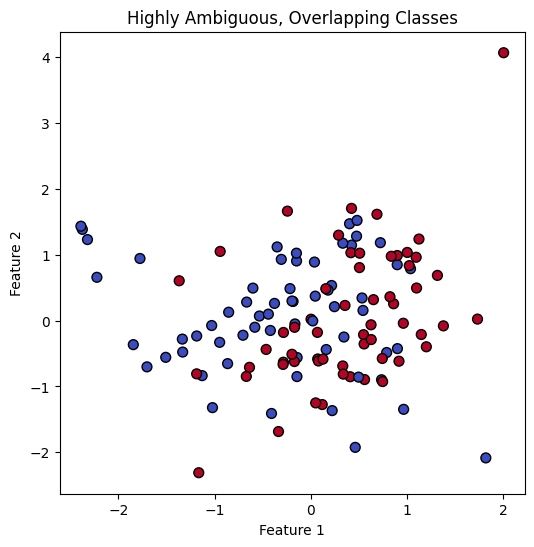

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=120, n_features=2, n_informative=2, n_redundant=0,
    n_classes=2, n_clusters_per_class=2,
    flip_y=0.2,         # 20% label noise
    class_sep=0.4,      # small separation (strong overlap)
    random_state=42
)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Highly Ambiguous, Overlapping Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Train Quantum Kernel SVM
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

svc = SVC(kernel=quantum_kernel.evaluate)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f'[SVM] Test accuracy: {baseline_acc:.3f}')

/tmp/ipython-input-26-3893622402.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


[SVM] Test accuracy: 0.500


In [ ]:
# Find misclassified ("ambiguous") test points

misclassified_idx = np.where(y_pred != y_test)[0]
print(f'[SVM] Misclassified points: {len(misclassified_idx)}')


[SVM] Misclassified points: 18


/tmp/ipython-input-28-2194090175.py:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[correctly_classified_idx, 0], X_test[correctly_classified_idx, 1],


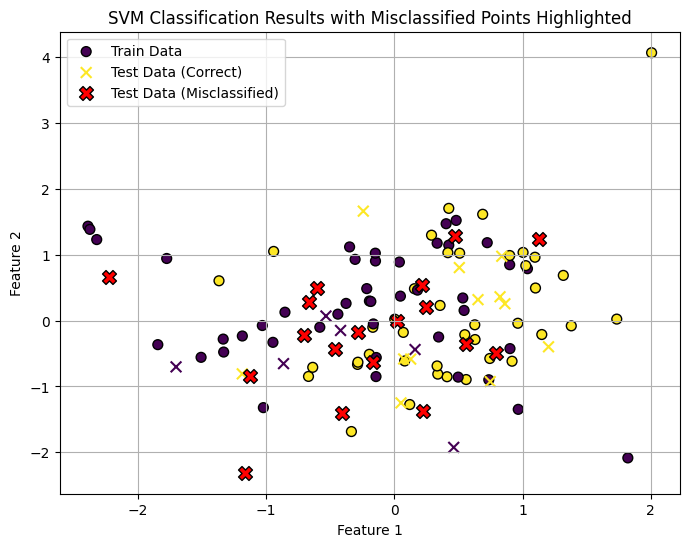

In [ ]:
# Plotting misclassified points
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', edgecolors='k', s=50, label='Train Data')

# Plot test data (correctly classified)
correctly_classified_idx = np.where(y_pred == y_test)[0]
plt.scatter(X_test[correctly_classified_idx, 0], X_test[correctly_classified_idx, 1],
            c=y_test[correctly_classified_idx], cmap='viridis', marker='x', edgecolors='k', s=60, label='Test Data (Correct)')

# Plot misclassified test data
misclassified_idx = np.where(y_pred != y_test)[0]
plt.scatter(X_test[misclassified_idx, 0], X_test[misclassified_idx, 1],
            c='red', marker='X', s=100, label='Test Data (Misclassified)', edgecolors='k') # Using a distinct color/marker for misclassified

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification Results with Misclassified Points Highlighted')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Implement KD-Tree to reclassify SVM errors

# Identify misclassified points from SVM prediction
misclassified_idx = np.where(y_pred != y_test)[0]
X_misclassified = X_test[misclassified_idx]
y_misclassified_true = y_test[misclassified_idx] # True labels for the misclassified points

print(f"Number of SVM misclassified points to reclassify with KD-Tree: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
    # Find the best k for reclassifying *these specific misclassified points*
    # using the original training data
    k_values_for_reclassification = range(1, 11) # Define a range for k
    best_k_reclass, reclassification_acc, y_reclassified_pred = find_best_k(
        X_train, y_train, X_misclassified, y_misclassified_true, k_values_for_reclassification
    )

    # Create an array for final predictions, starting with SVM predictions
    y_final_pred = y_pred.copy()

    # Update the predictions for the misclassified points with the KD-Tree predictions
    y_final_pred[misclassified_idx] = y_reclassified_pred

    # Evaluate the accuracy of the hybrid approach on the full test set
    hybrid_acc = accuracy_score(y_test, y_final_pred)

    print(f"Optimal k for reclassification: {best_k_reclass}")
    print(f"Accuracy of KD-Tree on SVM misclassified points: {reclassification_acc:.4f}")
    print(f"Accuracy of Hybrid (SVM + KD-Tree reclassification) approach on full test set: {hybrid_acc:.4f}")

else:
    print("No SVM misclassified points to reclassify.")
    hybrid_acc = baseline_acc # Hybrid accuracy is the same as SVM accuracy if no points were misclassified
    y_final_pred = y_pred.copy()
    print(f"Hybrid accuracy is the same as SVM accuracy: {hybrid_acc:.4f}")

Number of SVM misclassified points to reclassify with KD-Tree: 18
Optimal k for reclassification: 7
Accuracy of KD-Tree on SVM misclassified points: 0.8333
Accuracy of Hybrid (SVM + KD-Tree reclassification) approach on full test set: 0.9167


In [ ]:
print(f'[Hybrid SVM + KD-tree] Test accuracy: {hybrid_acc:.3f}')

# -- Print details of misclassified points --
print("\n--- Misclassified Points ---------------------------------------------------------")
for idx, (x, y_true, y_pred) in enumerate(zip(X_test[misclassified_idx], y_test[misclassified_idx], y_final_pred[misclassified_idx])):
    print(f"Point {idx + 1}: x={x},     True Label={y_true},        Predicted Label={y_pred}")

[Hybrid SVM + KD-tree] Test accuracy: 0.917

--- Misclassified Points ---------------------------------------------------------
Point 1: x=[-0.46332213 -0.43722392],     True Label=1,        Predicted Label=1
Point 2: x=[-0.70405785 -0.22132105],     True Label=0,        Predicted Label=0
Point 3: x=[-0.28320663 -0.17932189],     True Label=1,        Predicted Label=1
Point 4: x=[-0.66586492  0.28195811],     True Label=0,        Predicted Label=0
Point 5: x=[0.47686047 1.28321539],     True Label=0,        Predicted Label=0
Point 6: x=[-0.60092257  0.4944047 ],     True Label=0,        Predicted Label=0
Point 7: x=[0.21735034 0.53417133],     True Label=0,        Predicted Label=0
Point 8: x=[0.24698224 0.21241293],     True Label=0,        Predicted Label=0
Point 9: x=[ 0.55528611 -0.35384702],     True Label=1,        Predicted Label=1
Point 10: x=[1.12582839 1.23944714],     True Label=1,        Predicted Label=1
Point 11: x=[-1.16384537 -2.31002816],     True Label=1,        Predi

Find the Optimal Kernel Using Qiskit's Trainable Quantum Kernel then Implement a KD-Tree

In [ ]:
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
# 2. Run Quantum Kernel Benchmark to find the best kernel (and train SVM)
# Create trainable feature map: trainable Ry layer + ZZFeatureMap
# Ensure parameter names are distinct
training_params = ParameterVector("theta", 1)
fm0 = QuantumCircuit(2)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)


# Create the ZZFeatureMap with distinct parameter names (e.g., 'phi')
feature_dimension = 2
fm1_params = ParameterVector("phi", feature_dimension)
fm1 = ZZFeatureMap(feature_dimension)
# Assign parameters to fm1 with the new names
fm1 = fm1.assign_parameters(fm1_params)

# Compose the circuits
feature_map = fm0.compose(fm1)

print(f"Trainable parameters: {training_params}")
print(f"Feature map parameters: {fm1_params}")

# Quantum kernel and Sampler Setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = TrainableFidelityQuantumKernel(
    fidelity=fidelity,
    feature_map=feature_map,
    training_parameters=training_params,
)

class QKTCallback:
  def __init__(self):
    self.loss = []

  def callback(self, nfev, params, loss, step, accepted):
    self.loss.append(loss)

cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)


# Quantum Kernel Trainer
qkt = QuantumKernelTrainer(
    quantum_kernel=kernel,
    loss="svc_loss",
    optimizer=spsa_opt,
    initial_point=[np.pi / 2]
)
qkt_results = qkt.fit(X_train, y_train)
optimized_kernel = qkt_results.quantum_kernel

# Train the final SVM with the optimized kernel
svc = SVC(kernel=optimized_kernel.evaluate)
svc.fit(X_train, y_train)

# Get SVM predictions and baseline accuracy
y_pred_svm = svc.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_svm)
print(f"\n[SVM Baseline] Test accuracy: {baseline_acc:.4f}")

# 3. Identify Misclassified Points from SVM prediction
misclassified_idx = np.where(y_pred_svm != y_test)[0]
X_misclassified = X_test[misclassified_idx]
y_misclassified_true = y_test[misclassified_idx] # True labels for the misclassified points

print(f"Number of SVM misclassified points to reclassify with KD-Tree: {len(misclassified_idx)}")

# 4. Reclassify with KD-Tree (if there are misclassified points)
y_final_pred = y_pred_svm.copy() # Start with SVM predictions

if len(misclassified_idx) > 0:
    # Find the best k for reclassifying *these specific misclassified points*
    # using the original training data
    k_values_for_reclassification = range(1, 11) # Define a range for k
    best_k_reclass, reclassification_acc, y_reclassified_pred = find_best_k(
        X_train, y_train, X_misclassified, y_misclassified_true, k_values_for_reclassification
    )

    # Update the predictions for the misclassified points with the KD-Tree predictions
    y_final_pred[misclassified_idx] = y_reclassified_pred

    # Evaluate the accuracy of the KD-Tree on just the misclassified points
    print(f"Optimal k for reclassification: {best_k_reclass}")
    print(f"Accuracy of KD-Tree on SVM misclassified points: {reclassification_acc:.4f}")

# 5. Evaluate the accuracy of the Hybrid approach on the full test set
hybrid_acc = accuracy_score(y_test, y_final_pred)
print(f"\n[Hybrid SVM + KD-Tree] Final Test accuracy: {hybrid_acc:.4f}")

misclassified_after_hybrid_idx = np.where(y_final_pred != y_test)[0]
print(f"Number of points misclassified after hybrid approach: {len(misclassified_after_hybrid_idx)}")

Trainable parameters: theta, ['theta[0]']
Feature map parameters: phi, ['phi[0]', 'phi[1]']


/tmp/ipython-input-17-3883545899.py:26: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-17-3883545899.py:27: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)



[SVM Baseline] Test accuracy: 0.5000
Number of SVM misclassified points to reclassify with KD-Tree: 18
Optimal k for reclassification: 6
Accuracy of KD-Tree on SVM misclassified points: 0.7222

[Hybrid SVM + KD-Tree] Final Test accuracy: 0.8611
Number of points misclassified after hybrid approach: 5


We will run the same steps as above but with 4 features instead.

In [ ]:
X, y = make_classification(
    n_samples=120, n_features=4, n_informative=4, n_redundant=0,
    n_classes=2, n_clusters_per_class=2,
    flip_y=0.2,         # 20% label noise
    class_sep=0.4,      # small separation (strong overlap)
    random_state=42
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Quantum Kernel SVM
feature_map = ZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
quantum_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

svc = SVC(kernel=quantum_kernel.evaluate)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f'[SVM] Test accuracy: {baseline_acc:.3f}')

/tmp/ipython-input-20-3908323119.py:9: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-20-3908323119.py:10: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


[SVM] Test accuracy: 0.556


In [ ]:
# Implement KD-Tree to reclassify SVM errors

# Identify misclassified points from SVM prediction
misclassified_idx = np.where(y_pred != y_test)[0]
X_misclassified = X_test[misclassified_idx]
y_misclassified_true = y_test[misclassified_idx] # True labels for the misclassified points

print(f"Number of SVM misclassified points to reclassify with KD-Tree: {len(misclassified_idx)}")

if len(misclassified_idx) > 0:
    # Find the best k for reclassifying *these specific misclassified points*
    # using the original training data
    k_values_for_reclassification = range(1, 11) # Define a range for k
    best_k_reclass, reclassification_acc, y_reclassified_pred = find_best_k(
        X_train, y_train, X_misclassified, y_misclassified_true, k_values_for_reclassification
    )

    # Create an array for final predictions, starting with SVM predictions
    y_final_pred = y_pred.copy()

    # Update the predictions for the misclassified points with the KD-Tree predictions
    y_final_pred[misclassified_idx] = y_reclassified_pred

    # Evaluate the accuracy of the hybrid approach on the full test set
    hybrid_acc = accuracy_score(y_test, y_final_pred)

    print(f"Optimal k for reclassification: {best_k_reclass}")
    print(f"Accuracy of KD-Tree on SVM misclassified points: {reclassification_acc:.4f}")
    print(f"Accuracy of Hybrid (SVM + KD-Tree reclassification) approach on full test set: {hybrid_acc:.4f}")

else:
    print("No SVM misclassified points to reclassify.")
    hybrid_acc = baseline_acc # Hybrid accuracy is the same as SVM accuracy if no points were misclassified
    y_final_pred = y_pred.copy()
    print(f"Hybrid accuracy is the same as SVM accuracy: {hybrid_acc:.4f}")

Number of SVM misclassified points to reclassify with KD-Tree: 16
Optimal k for reclassification: 3
Accuracy of KD-Tree on SVM misclassified points: 0.6875
Accuracy of Hybrid (SVM + KD-Tree reclassification) approach on full test set: 0.8611


In [ ]:
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
# 2. Run Quantum Kernel Benchmark to find the best kernel (and train SVM)
# Create trainable feature map: trainable Ry layer + ZZFeatureMap
# Ensure parameter names are distinct
training_params = ParameterVector("theta", 1)
fm0 = QuantumCircuit(4)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)
fm0.ry(training_params[0], 2)
fm0.ry(training_params[0], 3)


# Create the ZZFeatureMap with distinct parameter names (e.g., 'phi')
feature_dimension = 4
fm1_params = ParameterVector("phi", feature_dimension)
fm1 = ZZFeatureMap(feature_dimension)
# Assign parameters to fm1 with the new names
fm1 = fm1.assign_parameters(fm1_params)

# Compose the circuits
feature_map = fm0.compose(fm1)

print(f"Trainable parameters: {training_params}")
print(f"Feature map parameters: {fm1_params}")

# Quantum kernel and Sampler Setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
kernel = TrainableFidelityQuantumKernel(
    fidelity=fidelity,
    feature_map=feature_map,
    training_parameters=training_params,
)

class QKTCallback:
  def __init__(self):
    self.loss = []

  def callback(self, nfev, params, loss, step, accepted):
    self.loss.append(loss)

cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)


# Quantum Kernel Trainer
qkt = QuantumKernelTrainer(
    quantum_kernel=kernel,
    loss="svc_loss",
    optimizer=spsa_opt,
    initial_point=[np.pi / 2]
)
qkt_results = qkt.fit(X_train, y_train)
optimized_kernel = qkt_results.quantum_kernel

# Train the final SVM with the optimized kernel
svc = SVC(kernel=optimized_kernel.evaluate)
svc.fit(X_train, y_train)

# Get SVM predictions and baseline accuracy
y_pred_svm = svc.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred_svm)
print(f"\n[SVM Baseline] Test accuracy: {baseline_acc:.4f}")

# 3. Identify Misclassified Points from SVM prediction
misclassified_idx = np.where(y_pred_svm != y_test)[0]
X_misclassified = X_test[misclassified_idx]
y_misclassified_true = y_test[misclassified_idx] # True labels for the misclassified points

print(f"Number of SVM misclassified points to reclassify with KD-Tree: {len(misclassified_idx)}")

# 4. Reclassify with KD-Tree (if there are misclassified points)
y_final_pred = y_pred_svm.copy() # Start with SVM predictions

if len(misclassified_idx) > 0:
    # Find the best k for reclassifying *these specific misclassified points*
    # using the original training data
    k_values_for_reclassification = range(1, 11) # Define a range for k
    best_k_reclass, reclassification_acc, y_reclassified_pred = find_best_k(
        X_train, y_train, X_misclassified, y_misclassified_true, k_values_for_reclassification
    )

    # Update the predictions for the misclassified points with the KD-Tree predictions
    y_final_pred[misclassified_idx] = y_reclassified_pred

    # Evaluate the accuracy of the KD-Tree on just the misclassified points
    print(f"Optimal k for reclassification: {best_k_reclass}")
    print(f"Accuracy of KD-Tree on SVM misclassified points: {reclassification_acc:.4f}")

# 5. Evaluate the accuracy of the Hybrid approach on the full test set
hybrid_acc = accuracy_score(y_test, y_final_pred)
print(f"\n[Hybrid SVM + KD-Tree] Final Test accuracy: {hybrid_acc:.4f}")

misclassified_after_hybrid_idx = np.where(y_final_pred != y_test)[0]
print(f"Number of points misclassified after hybrid approach: {len(misclassified_after_hybrid_idx)}")

Trainable parameters: theta, ['theta[0]']
Feature map parameters: phi, ['phi[0]', 'phi[1]', 'phi[2]', 'phi[3]']


/tmp/ipython-input-21-1596302309.py:28: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-21-1596302309.py:29: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)



[SVM Baseline] Test accuracy: 0.4722
Number of SVM misclassified points to reclassify with KD-Tree: 19
Optimal k for reclassification: 3
Accuracy of KD-Tree on SVM misclassified points: 0.5789

[Hybrid SVM + KD-Tree] Final Test accuracy: 0.7778
Number of points misclassified after hybrid approach: 8
